# To predict Daily Bike Rentership

In [1]:
 #It is basicly used to draw static images in notebook
%matplotlib inline 
#ipython extension to reload modules before we run the code
%load_ext autoreload
# same as above autoreload 
%autoreload 2          
#occasionly provide double resolution!
%config InlineBackend.figure_format = 'retina' 

#here we have some libraries  to be used further
import numpy as np                   #used to include mathematics 
import pandas as pd                  #plot nice looking chart
import matplotlib.pyplot as plt      #managing the dataset to be used further

# load the datasets

In [2]:
data_path = 'hour.csv'  #here we have loaded the path of data
rides = pd.read_csv(data_path)   #to read .csv file we use pandas library

In [3]:
rides.head()   #here we can see tha data , if we use rides.head it will show only strting rows of data but if remove .head() it will show us whole data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# check out data
Dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012 as 'dteday' . The Riders are splitted  into 'casual' and 'registered' , and sum together as 'cnt'

Below we can see the number of bike riders over the first 20 days or so in the data set .Here we see that weekends have low rendership of bikes  . Data contains information about the things affect Biking rendership like holiday, mnth etc

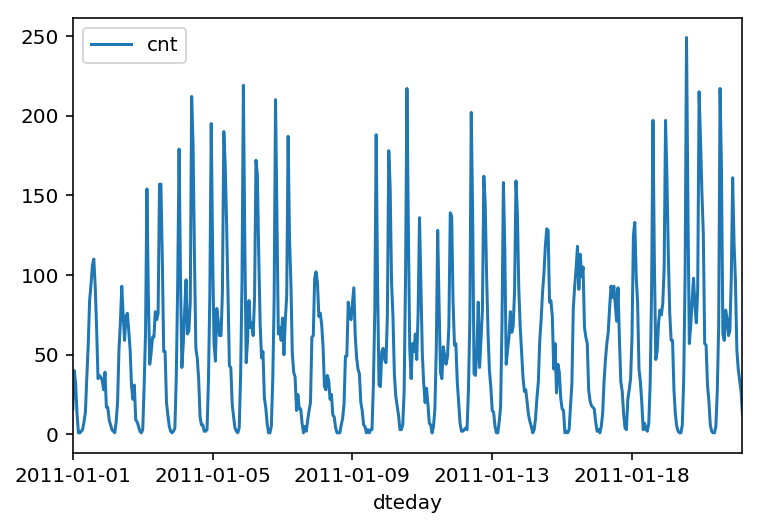

In [4]:
rides[:24*20].plot(x ='dteday' , y ='cnt')

# categorical data into dummy variables
   To get data in the form of 0, 1 as on or off as we do in switches for some fields as 'season' , 'hr'
   As we see weekday_0 ,1, 2 and so on  as monday ,tuesday as to reprsent 1 if monday... instead of 6 in weekday('saturday)

In [5]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)
    
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']

data = rides.drop(fields_to_drop, axis=1)

data.head()
    

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# scaling of data
 Here we have done the sacling because we want every features to at same scale ,so value will be at same scale it will be 
 easy to calculation

In [6]:
quant_feature = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for each in quant_feature:
    mean, std = data[each].mean(), data[each].std()   #calualting mean and standard deviation
    
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    
    


# Splitting of dataset as training and testing and validation


In [7]:
# Saving  data for approximately the last 21 *24  days * hours to use as test data
test_data = data[-21*24:]  

        
# Now remove the test data from the data set here we  have data from 0 till 15866 we remove last data of 21 days
data = data[:-21*24]  

# Separate the data into features and targets
# here features is basically rhe independent variable targets is output which we get after as a prediction and it is depend on the every features to calculate it
target_fields = ['cnt', 'casual' ,'registered']

#here our data contains every features like cnt dteday , holiday  so we use drop to remove target fileds that are going to calculated through thes features
features, targets = data.drop(target_fields, axis=1), data[target_fields]

# here we divide the data to be tested after training and validation
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]



In [8]:
#data to be trained to use features and to see targets prediction during traning
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]


#  neural network

  Here we gonna build our neural network as input layer , hidden layer , output layer .  set the hyperparameters: the  learning rate, the number of hidden units, and the number of training passes
   The hidden layer will use the sigmoid function as  activations.  All of the outputs from one layer become inputs to the   neurons on the next layer. This process is called forward propagation. 
   The weights to also propagate error backwards from the output back into the network to update our weights. This is called backpropagation.

In [9]:
# now whole process to build the neural network
#here we have taken a class name 'Neural Network'
class NeuralNetwork(object):
    # here we initalizes the init function which work as constructor only we have to initilization the object
    #we are passing parameters like self(it is object of class) 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        #here we are intilizing the values for the object which we will create later which will be passed as self
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        #we have weights which we will apply in input node to get output(#hidden)
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))
        #we have weights which we will apply to hidden layer (nodes) to get output
        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        
        #here we have learning rate which in training speed  
        self.lr = learning_rate
        
        #Set self.activation_function to your implemented sigmoid function
        #
        # here lambda is a  anonymous function ,which can take any number of arguments, but can only have one expression. 
        self.activation_function = lambda x : 1 / (1 + np.exp(-x))  # Replace 0 with your sigmoid calculation.
    
           #or we can use sigmoid   
        
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    
    #here we start training of data to build our network
    def train(self, features, targets):
        
        #initilization of size of  features which will help as to get output as it includes all factors afftecting bike renterhip
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
             # Implement the forward pass function which we define next to it , which is a way to get output
            final_outputs, hidden_outputs = self.forward_pass_train(X) 
            # Implement the backproagation function which is also define next
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)

    #it is a path from inputs to hiiden to output layers here we define how input * weiights and apply activation function to get output
    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch

        '''
       
        ### Forward pass ###
        # TODO: Hidden layer - X as input nodes which is multipliyed by weights from input to hidden
        hidden_inputs = np.dot(X , self.weights_input_to_hidden ) # signals into hidden layer
        #then we apply hidden layer to 'hidden_inputs'
        hidden_outputs = self.activation_function( hidden_inputs )  # signals from hidden layer
        #  to get Output layer -
        #we apply same process from hidden to outputs
        final_inputs = np.dot(hidden_outputs , self.weights_hidden_to_output ) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        #here we return the values 
        return final_outputs , hidden_outputs
    
    #As we get output(prediction) we will have surely different result from actual output
    #so as to minimize the error we do backpropagation and we update weights
    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers

        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        # Output error
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        # here  we Calculate the hidden layer's contribution to the error
        output_error_term = error * 1
        # what error we got to output layer because  now we strts reversing (talking about output layer)
        hidden_error = output_error_term * self.weights_hidden_to_output
        
        # now to calculate derivative for the Backpropagated error terms  for hidden layer
       
        hidden_output_derivative = hidden_outputs * (1 - hidden_outputs)   # we assume [ f'(h) = f'(h)*(1- f'(h)) ]
        hidden_error_term = hidden_error.T * hidden_outputs * (1 - hidden_outputs)   #now error froms output into upper codee 

        delta_weights_i_h += hidden_error_term * X[:,None]  # change in weights * error_term

        # Weight step (hidden to output)
        
        delta_weights_h_o += output_error_term * hidden_outputs[:,None]
        
        return delta_weights_i_h, delta_weights_h_o
    
    # here we are updating weights using gradient step
    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step(#backpropagation)
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        self.weights_hidden_to_output += self.lr * (delta_weights_h_o / n_records) # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * (delta_weights_i_h / n_records) # update input-to-hidden weights with gradient descent step
    
    # now we again run forward pass after one step of back progation to see if there is minimization of errror
    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # Hidden layer - replace these values with the appropriate calculations.
        
        hidden_inputs = np.dot(features , self.weights_input_to_hidden ) # signals into hidden layer
        
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # Output layer - Replace these values with the appropriate calculations.
        
        final_inputs = np.dot(hidden_outputs ,self.weights_hidden_to_output) # signals into final output layer

        return final_inputs

In [10]:
#now import of neural network is complete

In [11]:
#making a function name of MSE
def MSE(y, Y):
    return np.mean((y-Y)**2)

# Unit tests

Run these unit tests to check the correctness of our network implementation. This will help us be sure your network was implemented correctly befor you starting trying to train it. These tests must all be successful to pass the project.
taking small values to see if this works correctly in form of matrix multiplication


In [13]:
# is this only to check we have made a correct structure we can also ignore it
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))
        

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

# Training of network now starts from here 
Here we set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

In [26]:
import sys
#now we set hyperparameters  to get our   neural network trained

hidden_nodes =6   # how many  hidden layers we prefer less
iterations = 100  # epochs  how many times we want train of data  and want to find a number here where the network has a low training loss, and the validation loss is at a minimum. The ideal number of iterations would be a level that stops shortly after the validation loss is no longer decreasing.
output_nodes = 1   # output units
learning_rate = 0.6  # lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

N_i = train_features.shape[1]  #input nodes as a features
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)  # object for class

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a  batch of 128 records from the training data set we can take any batch_size of our choice
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt'] # iloc is used to set index for row and column
                             
    network.train(X, y)  # here we pass into the class which we have made for neural network
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    
# At last we have conclusion that if validation loss is also decreaing with training loss that mean we are on right path
  #but if validation loss increase then we have to change our parameters
  

Progress: 99.0% ... Training loss: 0.390 ... Validation loss: 0.636

(0.42738466359219457, 1.3992335895181753)

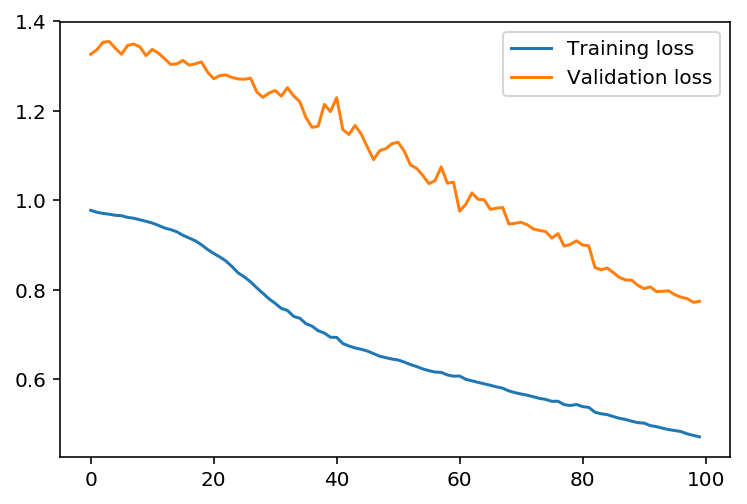

In [20]:
# check out our validation loss and training loss
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim()

# Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.
Here we do the testing of data after training


[Text(0, 0, 'Dec 11'),
 Text(0, 0, 'Dec 12'),
 Text(0, 0, 'Dec 13'),
 Text(0, 0, 'Dec 14'),
 Text(0, 0, 'Dec 15'),
 Text(0, 0, 'Dec 16'),
 Text(0, 0, 'Dec 17'),
 Text(0, 0, 'Dec 18'),
 Text(0, 0, 'Dec 19'),
 Text(0, 0, 'Dec 20'),
 Text(0, 0, 'Dec 21'),
 Text(0, 0, 'Dec 22'),
 Text(0, 0, 'Dec 23'),
 Text(0, 0, 'Dec 24'),
 Text(0, 0, 'Dec 25'),
 Text(0, 0, 'Dec 26'),
 Text(0, 0, 'Dec 27'),
 Text(0, 0, 'Dec 28'),
 Text(0, 0, 'Dec 29'),
 Text(0, 0, 'Dec 30'),
 Text(0, 0, 'Dec 31')]

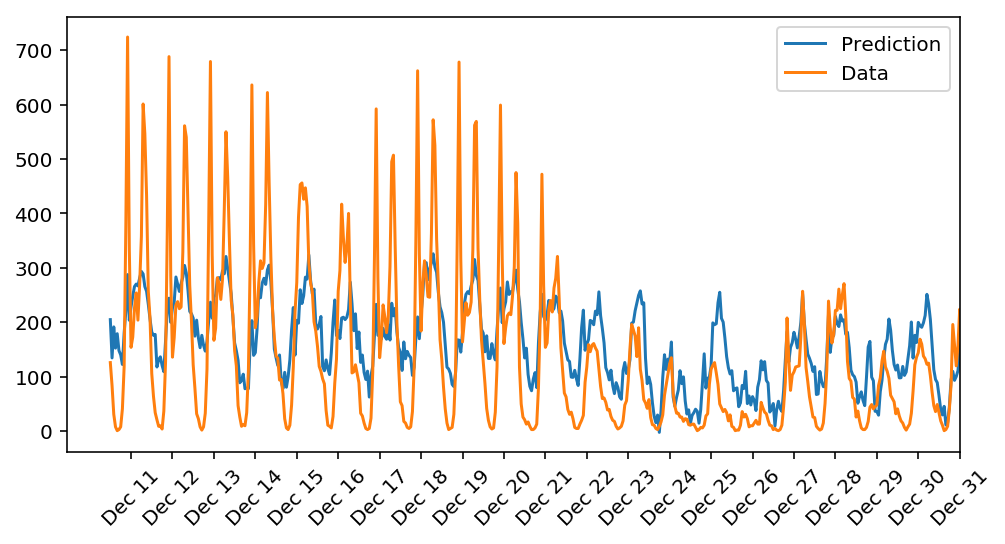

In [25]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
ax.set_xticklabels(dates[12::24], rotation=45)